# Imports 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

img_dir = '/Users/michal/Documents/TRAIN/final/cats_vs_dogs'
images = os.listdir(img_dir)

Using TensorFlow backend.


# RGB layers function

In [2]:
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    im_shape = image.shape
    assert image.ndim == 3
    assert im_shape[-1] == 3
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    return fig

# Loading images for ML from WU

In [3]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(60, 60))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


# Preparing training model

In [4]:
#but first keras imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=2)
from keras.layers import Dropout, BatchNormalization

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [6]:
#Training model
model = Sequential([
Conv2D(32, (3, 3), input_shape=(60, 60, 3), activation='relu'),
BatchNormalization(),
Conv2D(32, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(64, activation='relu'),
Dropout(0.25),
Dense(1, activation='sigmoid'),

    ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
stop_early = EarlyStopping(patience=6)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.04, callbacks=[stop_early])

Train on 8640 samples, validate on 360 samples
Epoch 1/30
8640/8640 [==============================] - 93s 11ms/step - loss: 0.6894 - accuracy: 0.5942 - val_loss: 0.6713 - val_accuracy: 0.5722
Epoch 2/30
8640/8640 [==============================] - 87s 10ms/step - loss: 0.6248 - accuracy: 0.6479 - val_loss: 0.6157 - val_accuracy: 0.6750
Epoch 3/30
8640/8640 [==============================] - 88s 10ms/step - loss: 0.5631 - accuracy: 0.6995 - val_loss: 0.6431 - val_accuracy: 0.6389
Epoch 4/30
8640/8640 [==============================] - 90s 10ms/step - loss: 0.5013 - accuracy: 0.7449 - val_loss: 0.5032 - val_accuracy: 0.7611
Epoch 5/30
8640/8640 [==============================] - 90s 10ms/step - loss: 0.4574 - accuracy: 0.7866 - val_loss: 0.5242 - val_accuracy: 0.7389
Epoch 6/30
8640/8640 [==============================] - 93s 11ms/step - loss: 0.4211 - accuracy: 0.8120 - val_loss: 0.5055 - val_accuracy: 0.7556
Epoch 7/30
8640/8640 [==============================] - 93s 11ms/step - loss:

In [13]:
model.save("MICHAL_ZELAZO_38685_MODEL.h5")

# Visualisation of training loss and validation loss

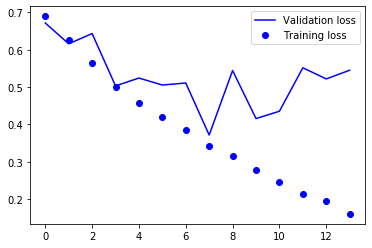

In [7]:
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.legend()
plt.show()

# Testing set

In [8]:
loss, acc = model.evaluate(X_test, y_test,)
print ('Test loss:', loss)
print('Test accuracy', acc)

1000/1000 [==============================] - 3s 3ms/step
Test loss: 0.5844222738742828
Test accuracy 0.8199999928474426


In [83]:
test_sample = X_test[:100]
predictions = model.predict(test_sample)
true_labels = y_test[:100]

/Users/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-0.5, 59.5, 59.5, -0.5)

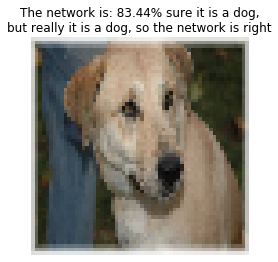

In [84]:
check_idx = 60
plt.imshow(test_sample[check_idx] / 255)


text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5

plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

In [101]:
#CHECK_IDX NO. OF PHOTOS FOR FIRST 55 WHICH ARE INCORRECTLY RECOGNIZED: 23 , 46 , 26 , 50,  51, 54

# Last but not least

0
2
3
5
6
7
1
4
11
12
17
31


(-0.5, 59.5, 59.5, -0.5)

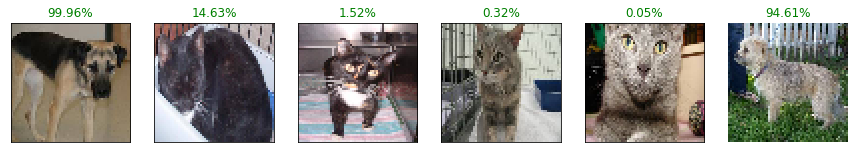

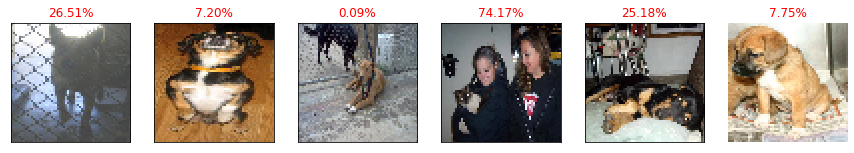

In [100]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15, 8))
    k = 0
        for i in range(8):
            check_idx = i
            correct_response = true_labels[check_idx]
            net_claims = predictions[check_idx, 0]
            is_net_correct = np.abs(net_claims - correct_response) < 0.5 
                if is_net_correct == True:
                    print(check_idx)
                        ax[k].imshow(test_sample[check_idx] / 255)  
                        ax[k].set_title(text.format(net_claims * 100.),color='green')
                        ax[k].set_xticks([])
                        ax[k].set_yticks([])
                        k = k+1
                        print

text = '{:.2f}%'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) 
plt.title(text.format(net_claims * 100.),color='green')
plt.axis('off')

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15, 8))
k = 0
    for i in range(32):
        check_idx = i
        correct_response = true_labels[check_idx]
        net_claims = predictions[check_idx, 0]
        is_net_correct = np.abs(net_claims - correct_response) < 0.5 
            if is_net_correct == False:
                print(check_idx)
                    ax[k].imshow(test_sample[check_idx] / 255)  
                    ax[k].set_title(text.format(net_claims * 100.), color='red')
                    ax[k].set_xticks([])
                    ax[k].set_yticks([])
                    k = k+1
                    print
        
text = '{:.2f}%'
correct_response = true_labels[check_idx]
net_claims = predictions[check_idx, 0]
plt.title(text.format(net_claims * 100.), color='red')
plt.axis('off')